In [1]:
import seaborn as sns
data=sns.load_dataset('iris')

In [2]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
features=data.drop(columns='species',axis=0)

In [5]:
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
features.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Kmeans 

KMeans clustering is an unsupervised machine learning algorithm that groups similar data points into K clusters. It starts by randomly selecting K centroids (cluster centers) and then assigns each data point to the nearest centroid, forming clusters. The centroids are then recalculated as the average of all points in their respective clusters. This assignment and update process repeats until the centroids stabilize, meaning they no longer change significantly. The result is K distinct clusters where each data point is closer to its own cluster's centroid than to any other, effectively grouping similar data points together.

KMeans clustering is suitable for the Iris dataset because it groups data points based on similar sepal and petal measurements. The algorithm effectively finds natural clusters in the data that often match the actual flower species: setosa, versicolor, and virginica.

In [7]:
from sklearn.preprocessing import StandardScaler
standerd=StandardScaler()
scaled_features=standerd.fit_transform(features)

In [8]:
from sklearn.cluster import KMeans

In [9]:
inertia=[]
k_values=range(1,11)
for k in k_values:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

C:\Users\shamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [10]:
inertia

[599.9999999999999,
 222.36170496502297,
 139.8204963597497,
 114.30449485021936,
 90.80759161913353,
 80.87454848970134,
 72.16992143369515,
 63.24538962941823,
 55.25182547410472,
 47.2232397025121]

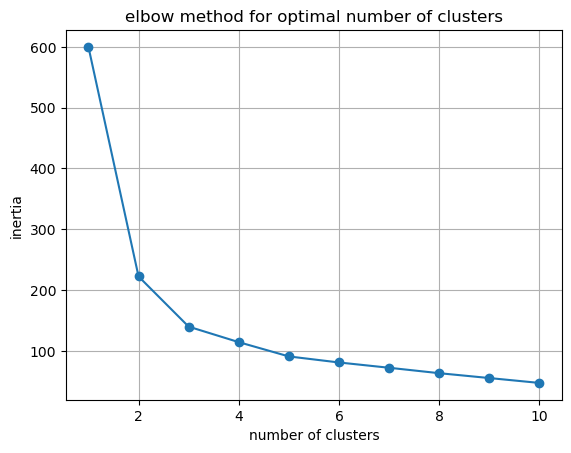

In [11]:
import matplotlib.pyplot as plt
plt.plot(k_values,inertia,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.title('elbow method for optimal number of clusters')
plt.grid(True)
plt.show()

In [12]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit_predict(scaled_features)
data['cluster']=kmeans.labels_

C:\Users\shamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
list(data)

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species',
 'cluster']

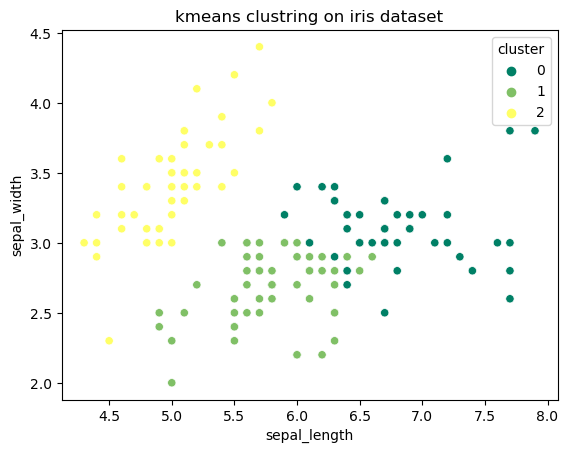

In [14]:
import seaborn as sns
sns.scatterplot(x=features["sepal_length"],y=features['sepal_width'],hue=data['cluster'],palette='summer')
plt.title('kmeans clustring on iris dataset')
plt.show()

# Hierarchaial clustering

Hierarchical clustering is a method of grouping data by either merging smaller clusters into bigger ones (agglomerative) or splitting larger clusters into smaller ones (divisive). In the agglomerative approach, each data point starts as its own cluster. The closest clusters are combined, and this process repeats until all points are in one cluster or a set number of clusters is reached. The clusters can be visualized using a tree-like diagram called a dendrogram, which shows how the clusters are joined together step by step.

Hierarchical clustering is a good choice for the Iris dataset because it doesn't require knowing the number of clusters beforehand. This is helpful since the Iris dataset has three species of flowers, and hierarchical clustering can reveal their natural groupings. It also allows us to see how the species are related to each other in a tree-like diagram called a dendrogram. Since the dataset is small, hierarchical clustering works efficiently and helps us visualize the clusters clearly.

In [17]:
data=sns.load_dataset('iris')

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
data['cluster']=hc.fit_predict(scaled_features)
data

C:\Users\shamn\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


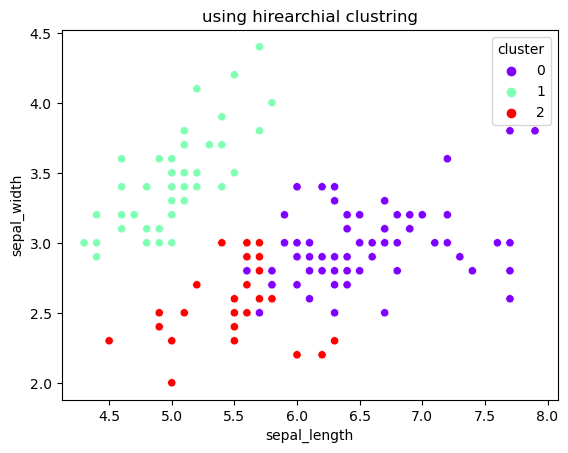

In [21]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=data,hue='cluster',palette='rainbow')
plt.title('using hirearchial clustring')
plt.show()

In [23]:
from scipy.cluster.hierarchy import dendrogram,linkage
z=linkage(scaled_features,method='ward')

In [26]:
lab=data['species'].tolist()

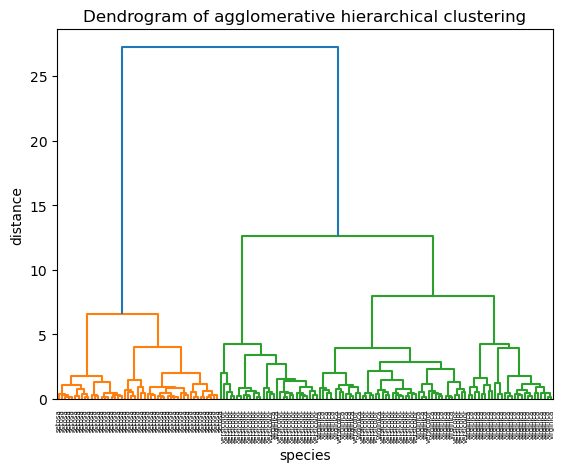

In [28]:
dendrogram(z,labels=lab,leaf_rotation=90)
plt.title('Dendrogram of agglomerative hierarchical clustering')
plt.xlabel('species')
plt.ylabel('distance')
plt.show()